In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# plan:
# each node (neuron) has n coordinats == the number of features in the sample space

# pick one sample at random
# find which node is the closest to it
# move it closer to that sample point (using the learning rate)
# update all nodes that are within r of the closest node above using a weighted 1/r formula of some sort

# each epoch the radius is shrinking

### Generate some shaped data

In [52]:
size = 500

x = np.random.normal(0,1,size)
y = np.random.normal(-1,1,size)
x[x>0]*=3
y[(x<1.5) * (y<0)]*=3

X = np.concatenate((x,y)).reshape(2,size).T

In [6]:
def find_clostest(nodes,sample):
    '''find the closest node to this sample'''
    min_dist = float('inf')
    n_rows,n_cols,_ = nodes.shape
    for i in range(n_rows):
        for j in range(n_cols):
            # distance to current node
            dist = ((nodes[i][j]-sample)**2).sum()
            if (dist<min_dist):
                # update if closer than previously closest
                min_dist = dist
                closest = (i,j)
    return closest

In [17]:
def find_starting_radius(nodes):
    '''compute the starting radius that is the smallest that still includes all nodes'''
    # assume the 'unit cell' of the grid is 1 and that it has the same scale over x and y
    x,y,_ = nodes.shape
    return (max(x,y))/2

In [19]:
def find_time_constant(iterations, start_radius):
    '''compute the time constant for the decay'''
    return iterations / math.log(start_radius)

In [20]:
def calculate_current_radius(start_radius, iteration, time_constant):
    '''compute the radius for the neighborhood search'''
    return start_radius * math.exp(-iteration/time_constant)

In [23]:
def updated_weights(current,sample,learning_rate):
    '''calculate the current update'''
    delta = sample-current
    return current + delta * learning_rate

In [38]:
def current_learning_rate(start_learning_rate,iteration,total_iterations):
    return start_learning_rate * math.exp ( -iteration/total_iterations )

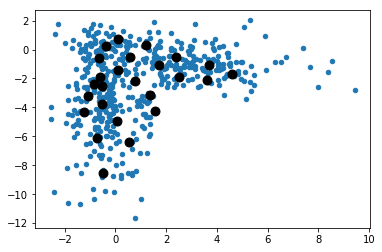

In [85]:
# number of iterations
iterations = 1000
# starting learning rate
learning_rate = 0.5

# setup grid
n_rows = 5
n_columns = 5
n_dim = X.ndim
# initialize nodes
nodes = np.random.normal(0,0.1,(n_rows,n_columns,n_dim))

# setup starting values
start_radius = find_starting_radius(nodes)
time_constant = find_time_constant(iterations,start_radius)

for i in range(iterations):
    # pick one sample at random
    sample = X[np.random.randint(len(X))]
    # fine BMU
    closest = find_clostest(nodes,sample)
    node = nodes[closest]
    # update radius and learning rate
    l = current_learning_rate(learning_rate,i,iterations)
    r_squared = (calculate_current_radius(start_radius,i,time_constant))**2
    # update BMU
    nodes[closest] = updated_weights(node,sample,learning_rate)
    # update neighbors
    ii,jj,_ = nodes.shape
    for i in range(ii):
        for j in range(jj):
            neighbor = nodes[i,j]
            if ((i,j) != closest):
                # distance to neighbor
                dist_squared = (np.array((closest[0]-i,closest[1]-j))**2).sum()
                # update neighbor if within radius (squared)
                if (dist_squared < r_squared):
                    influence = math.exp(-dist_squared/(2*r_squared) )
                    nodes[(i,j)] = updated_weights(nodes[(i,j)],sample,influence*l)
                    
# visualize data and map
plt.scatter(X[:,0],X[:,1],s=20)
plt.scatter(nodes[:,:,0],nodes[:,:,1],s=80,c='black')

plt.show()